# Todo el mundo saltando por el cumple de Marta
![](https://img.asmedia.epimg.net/resizer/v2/MEJDWMB4I5AFLMV7CDGRC3LBK4.jpg?auth=f7c6b4630cabb930f53b49a84fc3dd04341ade53466deb9ff454d3f8474f2f91&width=1472&height=828&smart=true)

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textserver import TextServer
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews as mr
from sklearn.model_selection import train_test_split
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Edu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Edu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Edu\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
y = ["pos"]*1000 + ["neg"]*1000 
corpus = []
for rev in mr.fileids():
    corpus.append((mr.raw(rev)))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

In [40]:
from math import log
def preprocess(review,func = lambda x: x):
    
   """Funció que rep una review com a paràmetre i retorna una llista amb les paraules de la review,
       eliminant els caràcters especials i passant-les a minúscules.
       Una vegada preprocessada la review, es calcula el sentiment de la mateixa tenint el compte el context utilitzant lesk,
       finalment es fa el sentiment analysis de cada synset i es retorna la mitjana de les puntuacions de cada paraula amb una funció escollida."""
   
   rev_score = {'pos': 0, 'neg': 0, 'obj': 0} 
   review = ''.join(c for c in review if c.isalpha() or c == ' ')
   review = review.lower()
   stop_words = set(stopwords.words('english'))
   review = ' '.join([word for word in review.split() if word not in stop_words])
   lemmatizer = nltk.WordNetLemmatizer()
   review = ' '.join(lemmatizer.lemmatize(word) for word in review.split())
   for sentence in review.split("\n"):
        token_sentence = nltk.word_tokenize(sentence)
        for word in token_sentence:
            disambiguated_word = lesk(token_sentence, word)
            if disambiguated_word is not None:
                synset = disambiguated_word
                synset_score = swn.senti_synset(synset.name())
                rev_score['pos'] += synset_score.pos_score()
                rev_score['neg'] += synset_score.neg_score()
                rev_score['obj'] += synset_score.obj_score()
            else:
                rev_score['obj'] += 0
   rev_score['pos'] = func(rev_score['pos'] / len(review.split()))
   rev_score['neg'] = func(rev_score['neg'] / len(review.split()))
   rev_score['obj'] = func(rev_score['obj'] / len(review.split()))
   return rev_score

In [36]:
def movie_review_categorizer(rev):
    """Funció que rep una review com a paràmetre i retorna si és positiu, negatiu o objectiu."""
    rev_score = preprocess(rev, lambda x: -log(x))
    if rev_score['pos'] > rev_score['neg']:
        return 'pos'
    elif rev_score['neg'] > rev_score['pos']:
        return 'neg'
    else:
        return 'pos'

In [37]:
import pandas as pd

In [38]:
results = []
for movie in X_test:
    results.append(movie_review_categorizer(movie))

results = pd.DataFrame(results)


              precision    recall  f1-score   support

         pos       0.58      0.81      0.68       201
         neg       0.68      0.42      0.52       199

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.60       400
weighted avg       0.63      0.61      0.60       400



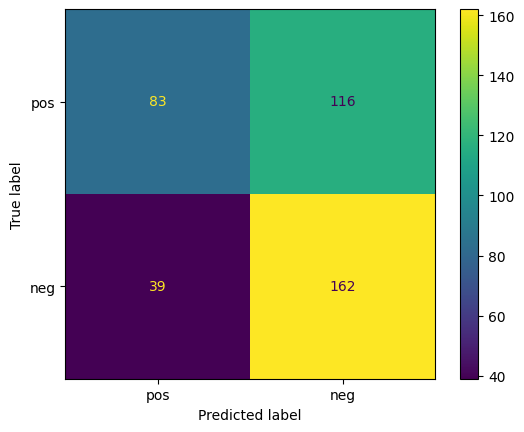

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

y_train_df = pd.DataFrame(y_test)
print(classification_report(y_train_df, results, target_names=['pos', 'neg']))
conf_matrix = confusion_matrix(y_train_df, results, labels=['pos', 'neg'])  
conf_matrix = ConfusionMatrixDisplay(conf_matrix, display_labels=['pos', 'neg'])
conf_matrix.plot()
plt.show()

In [27]:
y_train_df.describe()

,0
count,400
unique,2
top,neg
freq,201


In [28]:
results.describe()

,0
count,400
unique,2
top,pos
freq,278


In [123]:
results = []
for movie in X_test:
    results.append(preprocess(movie))

In [124]:
results = pd.DataFrame(results)
results.sample(30)

,pos,neg,obj
6,0.042143,0.039997,482.500
204,0.039171,0.033054,666.875
294,0.037445,0.033375,422.250
134,0.045925,0.054773,326.125
170,0.043822,0.040784,797.625
244,0.029589,0.061931,188.375
325,0.035061,0.031986,306.250
364,0.025314,0.035264,747.750
326,0.051157,0.032146,495.500
357,0.039647,0.036662,667.750


In [125]:
y_train_df.head()

,0
0,pos
1,pos
2,pos
3,pos
4,pos
